# Bombing Operations during the Vietnam War

## Introduction
### History
The Vietnam War was one of the costliest and most divisive conflicts the US has been involved in, to date. While no formal declaration of war was issued, American advisors had been involved in the Indochina region since the French occupation post-World War II. Formal US involvement began in earnest in 1964, after the [Gulf of Tonkin incident](https://en.wikipedia.org/wiki/Gulf_of_Tonkin_incident).  

The US and its allies relied heavily on air superiority to carry out offensive operations. The US also conducted large-scale strategic bombing campaigns in North Vietnam, some of the largest since the end of the Second World War. In the end, however, US involvement was not enough to prop up the South Vietnamese government and armed forces. As a result of the [Tet Offensive](https://en.wikipedia.org/wiki/Tet_Offensive), which showed the clear inabilitiy of the [ARVN](https://en.wikipedia.org/wiki/Army_of_the_Republic_of_Vietnam) to resist [NVA](https://en.wikipedia.org/wiki/People%27s_Army_of_Vietnam) forces, the US began to implement ["Vietnamization"](https://en.wikipedia.org/wiki/Vietnamization). Two years after the withdraw of US forces in August 1973, Saigon fell to the NVA, and North and South Vietnam were reunited the following year (1976).  

### U.S. Air Force Doctrine
USAF doctrine during this period focused heavily on close-air support and massive strategic bombing campaigns. Because of the notoriously thick jungle environment of Vietnam, close-air support aircraft began carrying napalm. As well, missions using Agent Orange were flown to defoliate the jungle, to try and increase the effectiveness of air support assets.  

Strategic bombing was a mainstay of the USAF bomber doctrine, ever since the end of the Second World War. However, because of fears of drawing China into the conflict, targets were heavily limited by the Johnson and Nixon administrations. As a result, the effectiveness of these strategic bombing campaigns were limited. When they were effectively employed, heavy bombers, such as the B-52, mainly targetted large factory complexes, in an attempt to degrade the North Vietnamese supply line and warfighting capabilities.  

Because of the general inaccuracy of carpet bombing, and the increased visibility of civilian casualties, more precise weapon systems were developed. These would heavily influence Air Force doctrine for the years to come.

![](b52_linebacker.jpg)

## Loading the Data

In [12]:
import zipfile
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
start = time.time()
z = zipfile.ZipFile('vietnam-war-bombing-operations.zip')
aircrafts = pd.read_csv(z.open('THOR_Vietnam_Aircraft_Glossary.csv'), encoding = 'ISO-8859-1')
weapons = pd.read_csv(z.open('THOR_Vietnam_Weapons_Glossary.csv'),encoding = 'ISO-8859-1')
bombing_ops = pd.read_csv(z.open('THOR_Vietnam_Bombing_Operations.csv'), parse_dates = True)
end = time.time()
print(f'3 files loaded in {end - start} seconds')

3 files loaded in 67.55747056007385 seconds


In [3]:
print('------DATASET SHAPES------')
print('BOMBING OPS:', bombing_ops.shape)
print('AIRCRAFT:', aircrafts.shape)
print('WEAPONS:', weapons.shape)

------DATASET SHAPES------
BOMBING OPS: (4670416, 47)
AIRCRAFT: (104, 8)
WEAPONS: (294, 6)


In [3]:
bombing_ops.head(3)

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0


In [7]:
bombing_ops.columns

Index(['COUNTRYFLYINGMISSION', 'MILSERVICE', 'MSNDATE', 'SOURCEID',
       'SOURCERECORD', 'VALID_AIRCRAFT_ROOT', 'TAKEOFFLOCATION',
       'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'TGTTYPE',
       'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE', 'WEAPONTYPECLASS',
       'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL', 'AIRCRAFT_ROOT',
       'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN', 'FLTHOURS', 'MFUNC',
       'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT', 'OPERATIONSUPPORTED',
       'PERIODOFDAY', 'UNIT', 'TGTCLOUDCOVER', 'TGTCONTROL', 'TGTCOUNTRY',
       'TGTID', 'TGTORIGCOORDS', 'TGTORIGCOORDSFORMAT', 'TGTWEATHER',
       'ADDITIONALINFO', 'GEOZONE', 'ID', 'MFUNC_DESC_CLASS',
       'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED', 'RELEASEALTITUDE',
       'RELEASEFLTSPEED', 'RESULTSBDA', 'TIMEOFFTARGET',
       'WEAPONSLOADEDWEIGHT'],
      dtype='object')

In [6]:
aircrafts.head(3)

,GLOSS_ID,VALIDATED_ROOT,AIRCRAFT_NAME,WEBSITE_LINK,AIRCRAFT_TYPE,AIRCRAFT_SHORTNAME,AIRCRAFT_APPLICATION,AC_MISSION_COUNT
0,1,A-1,Douglas A-1 Skyraider,http://www.navalaviationmuseum.org/attractions...,Fighter Jet,Skyraider,FIGHTER,373265
1,2,A-26,Douglas A-26 Invader,http://www.militaryfactory.com/aircraft/detail...,Light Bomber,Invader,BOMBER,36672
2,4,A-37,Cessna A-37 Dragonfly,http://www.militaryfactory.com/aircraft/detail...,Light ground-attack aircraft,Dragonfly,ATTACK,282699


In [7]:
aircrafts.columns

Index(['GLOSS_ID', 'VALIDATED_ROOT', 'AIRCRAFT_NAME', 'WEBSITE_LINK',
       'AIRCRAFT_TYPE', 'AIRCRAFT_SHORTNAME', 'AIRCRAFT_APPLICATION',
       'AC_MISSION_COUNT'],
      dtype='object')

In [8]:
weapons.head(3)

,WEAPON_ID,WEAPONTYPE,WEAPONTYPE_COMMON_NAME,WEAPON_CLASS,WEAPONTYPE_DESC,WEAPON_COUNT
0,1,100 GP,General Purpose Bomb,BOMB,100 lb general purpose,1
1,2,1000 G,Megaboller flash powder bomb,BOMB,1000 g BKS,2
2,3,1000LB GP M-65,An-M65,BOMB,1000 lb general purpose,12776


In [9]:
weapons.columns

Index(['WEAPON_ID', 'WEAPONTYPE', 'WEAPONTYPE_COMMON_NAME', 'WEAPON_CLASS',
       'WEAPONTYPE_DESC', 'WEAPON_COUNT'],
      dtype='object')

## Data Analysis and Visualization  
### Which country flew the most combat missions?

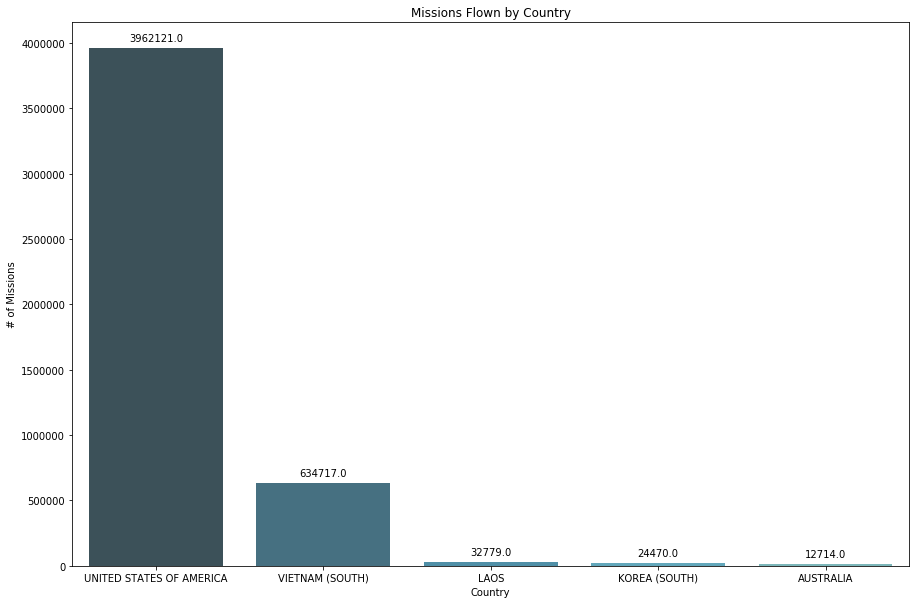

In [8]:
country_missions = bombing_ops.COUNTRYFLYINGMISSION
country_counts = country_missions.value_counts()
x, y = country_counts.keys().tolist(), country_counts.values

plt.figure(figsize = (15,10))
ax = sns.barplot(x = x, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Country')
plt.ylabel('# of Missions')
plt.title('Missions Flown by Country')

# From https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# Since SNS has no intuitive method to annotate
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

As to be expected, the United States flew the most missions. South Vietnam came in second, which makes sense, given the resources and equipment the US provided for ARVN.

### Which branch flew the most missions for the United States?

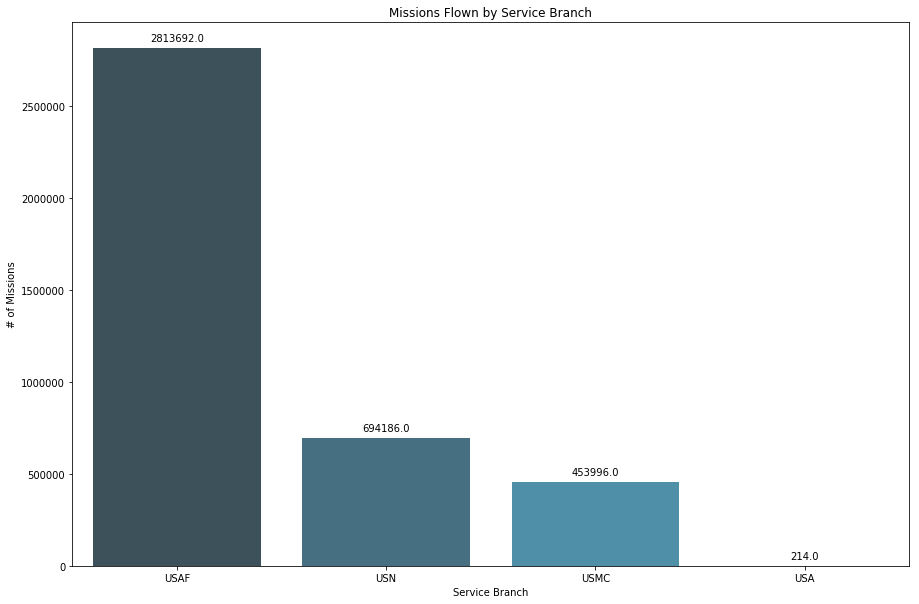

In [9]:
branches = bombing_ops[bombing_ops.COUNTRYFLYINGMISSION == 'UNITED STATES OF AMERICA'].MILSERVICE
branch_counts = branches.value_counts()
x, y = branch_counts.keys().tolist(), branch_counts.values

plt.figure(figsize = (15,10))
ax = sns.barplot(x = x, y = y, palette = sns.color_palette('GnBu_d'))
plt.xlabel('Service Branch')
plt.ylabel('# of Missions')
plt.title('Missions Flown by Service Branch')

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

As expected, the US Air Force flew the most combat sorties of all the four branches. Interestingly, the Army has a number of sorties listed. However, the number is too small to be rotary-wing aircraft, so it seems the Army did have fixed-wing aviation in country during the Vietnam War.

### Which campaign saw the heaviest bombing, by tonnage?

This is a tricky one. The dataset does not have intuitive methods to extract which campaign a sortie belongs to; some operations listed are not the same name as the official campaign they were part of. However, going just off date of mission means unrelated missions will be included with the campaign.

In [ ]:
ops = [
    {
        'name': 'Farm Hand'
        'start': datetime(1962, 1, 13),
        'end': datetime(1965, 1, 1)
    },
    {
        'name': 'Operation Pierce Arrow',
        'start': datetime(1964, 8, 5),
        'end': datetime(1964, 8, 5)
    },
    {
        'name': 'Operation Barrel Roll',
        'start': datetime(1964, 8, 5),
        'end': datetime(1964, 8, 5)
    },
    {
        'name': 'Operation Pierce Arrow',
        'start': datetime(1964, 8, 5),
        'end': datetime(1964, 8, 5)
    },
]

In [14]:
campaigns = bombing_ops[bombing_ops.NUMWEAPONSDELIVERED > 0]

In [22]:
campaigns.dropna(axis = 0, subset = ['OPERATIONSUPPORTED'], inplace = True)
campaigns['operation_agg'] = campaigns.OPERATIONSUPPORTED

In [40]:
campaigns.OPERATIONSUPPORTED.value_counts()

IN COUNTRY                      308943
IN COUNTRY - SOUTH VIETNAM      128125
ROLLING THUN                     90473
ROLLING THUN - ROLLING THUND     87752
STEEL TIGER                      79518
IN COUNTRY - VS                  53326
STEEL TIGER - STEEL TIGER        50290
BARREL ROLL - BARREL ROLL        14973
IN COUNTRY - SVN                 14971
STEEL TIGER - LA                 13027
BARREL ROLL                       9436
BARREL ROLL - FIREFLY             8057
STEEL TIGER - HOBO                6608
STEEL TIGER - COMBAT SKYSPOT      6519
IGLOO WHITE - MUSCLE SHOALS       6218
IN COUNTRY - COMBAT SKYSPOT       5931
BARREL ROLL - ZORRO               5872
BARREL ROLL - HOBO                4992
IN COUNTRY - COMBAT SKYSPO        4781
STEEL TIGER - LAOS                4733
STEEL TIGER - ZORRO               4340
IN COUNTRY - SKYSPOT              3560
BARREL ROLL - LA                  3357
IN COUNTRY - SVN HAWK    01       3258
STEEL TIGER - NIMROD              3219
IN COUNTRY - BLADE 01    

In [31]:
def sortie_tonnage(row):
    return row.NUMWEAPONSDELIVERED * row.WEAPONTYPEWEIGHT

campaigns['sortie_tonnage'] = campaigns.apply(sortie_tonnage, axis = 1)

In [17]:
campaign_tonnage = campaigns.groupby('OPERATIONSUPPORTED').sum().sort_values(by = 'sortie_tonnage', ascending = False).sortie_tonnage.reset_index()
campaign_tonnage.head()

,OPERATIONSUPPORTED,sortie_tonnage
0,IN COUNTRY,1038835495
1,ROLLING THUN - ROLLING THUND,416148179
2,STEEL TIGER,415255170
3,ROLLING THUN,393183312
4,IN COUNTRY - SOUTH VIETNAM,344155008


In [ ]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = campaign_tonnage.OPERATIONSUPPORTED, y = campaign_tonnage.sortie_tonnage, palette = sns.color_palette('GnBu_d'))
#plt.xlabel('Service Branch')
#plt.ylabel('# of Missions')
plt.title('Missions Flown by Service Branch')

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### Can we predict the country of origin for a bombing mission, given the sortie characteristics?

In [41]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree

In [45]:
bombing_ml = bombing_ops.copy()
col = 'COUNTRYFLYINGMISSION'
conditions  = [
    bombing_ops[col] == 'UNITED STATES OF AMERICA', 
    bombing_ops[col] == 'VIETNAM (SOUTH)',
    bombing_ops[col] == 'LAOS',
    bombing_ops[col] == 'KOREA (SOUTH)',
    bombing_ops[col] == 'AUSTRALIA'
]
choices     = [ 0, 1, 2, 3, 4 ]

bombing_ml['type'] = np.select(conditions, choices, default=np.nan).astype('int')

In [48]:
bombing_ml.drop(labels = 'COUNTRYFLYINGMISSION', axis = 1, inplace = True)
bombing_ml.head()

,THOR_DATA_VIET_ID,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,TGTTYPE,...,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT,type
0,351,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,NaN,...,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0,0
1,2,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,NaN,...,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0,0
2,3,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,NaN,...,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0,0
3,4,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,TRUCKS,...,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400,0
4,5,VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,BASE CAMP AREA,...,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0,1


In [ ]:
bombing_final = pd.get_dummies(bombing_ml, drop_first = True)
bombing_train, bombing_test = train_test_split(bombing_final, test_size = 0.2)
bombing_score = bombing_test.copy() # For score assessment

In [ ]:
df_rf = skens.RandomForestClassifier(n_estimators = 10, oob_score = True, criterion = 'entropy', random_state = 42)
df_rf.fit(bombing_train.iloc[:,bombing_train.columns != 'type'], bombing_train.type)